In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 이미지 읽기
img1 = cv2.imread('./img/robot_arm1.jpg')
img2 = cv2.imread('./img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [4]:
# 두 이미지 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

# 차영상 극대화하기 위해 스레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:, :, 2] = 0

In [5]:
# 두 번째 이미지에 다른 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

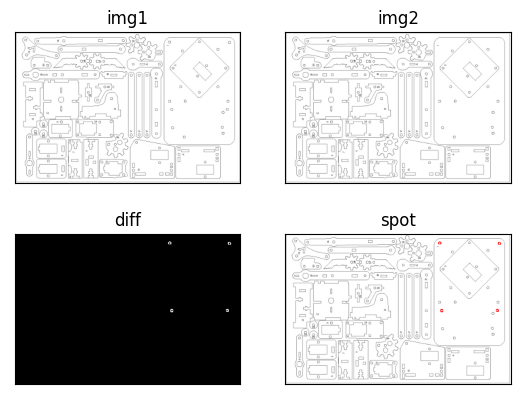

In [6]:
# 결과 출력
imgs = {'img1':img1, 'img2':img2, 'diff':diff, 'spot':spot}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2, 2, i+1)
    plt.title(k)
    if len(v.shape) == 2:
        plt.imshow(v, cmap='gray')
    else:
        plt.imshow(v[:,:,::-1])
    plt.xticks([])
    plt.yticks([])
    
plt.show()